<a href="https://colab.research.google.com/github/Baohikari/World_Data_2023_Clustering/blob/main/World_Data_2023_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = "/content/clean_world_data (1).csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,GDP,Life expectancy,Unemployment rate,Infant mortality,Physicians per thousand,Gross tertiary education enrollment (%),Out of pocket health expenditure
0,1.910135e+10,64.500000,11.120000,47.9,0.28,9.700000,78.4
1,1.527808e+10,78.500000,12.330000,7.8,1.20,55.000000,56.9
2,1.699882e+11,76.700000,11.700000,20.1,1.72,51.400000,28.1
3,3.154058e+09,72.279679,6.886364,2.7,3.33,37.963388,36.4
4,9.463542e+10,60.800000,6.890000,51.6,0.21,9.300000,33.4


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Chuẩn hóa dữ liệu (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Áp dụng thuật toán DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=8)  # eps và min_samples có thể điều chỉnh để thay đổi số cụm
clusters = dbscan.fit_predict(X_scaled)

# Gắn nhãn cụm vào DataFrame
df['Cluster'] = clusters

# Đếm số lượng quốc gia trong mỗi cụm
cluster_counts = df['Cluster'].value_counts()
df.head(), cluster_counts

(            GDP  Life expectancy  Unemployment rate  Infant mortality  \
 0  1.910135e+10        64.500000          11.120000              47.9   
 1  1.527808e+10        78.500000          12.330000               7.8   
 2  1.699882e+11        76.700000          11.700000              20.1   
 3  3.154058e+09        72.279679           6.886364               2.7   
 4  9.463542e+10        60.800000           6.890000              51.6   
 
    Physicians per thousand  Gross tertiary education enrollment (%)  \
 0                     0.28                                 9.700000   
 1                     1.20                                55.000000   
 2                     1.72                                51.400000   
 3                     3.33                                37.963388   
 4                     0.21                                 9.300000   
 
    Out of pocket health expenditure  Cluster  
 0                              78.4       -1  
 1                      

<ipython-input-4-4b8c9674aa2d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


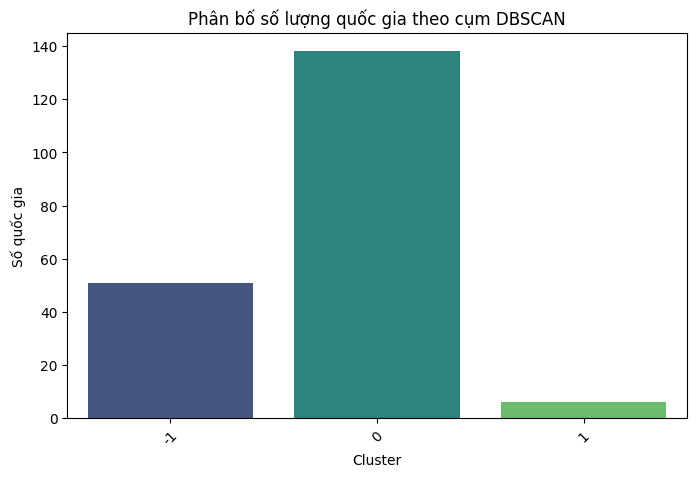

,count
Cluster,
0,138
-1,51
1,6


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số quốc gia trong từng cụm
cluster_counts = df['Cluster'].value_counts()

# Vẽ biểu đồ phân bố số lượng quốc gia theo cụm
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Số quốc gia")
plt.title("Phân bố số lượng quốc gia theo cụm DBSCAN")
plt.xticks(rotation=45)
plt.show()

# Hiển thị số lượng quốc gia trong mỗi cụm
cluster_counts


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

filtered_df = df[df['Cluster'] != -1]
X_filtered = X_scaled[df['Cluster'] != -1]
labels_filtered = filtered_df['Cluster']

# Kiểm tra nếu có ít hơn 2 cụm thì không thể tính Silhouette Score
if len(set(labels_filtered)) > 1:
    silhouette_avg = silhouette_score(X_filtered, labels_filtered)
    dbi = davies_bouldin_score(X_filtered, labels_filtered)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {dbi:.4f}")
else:
    print("Không thể tính Silhouette Score vì chỉ có một cụm hoặc toàn bộ điểm bị coi là nhiễu.")

Silhouette Score: 0.0627
Davies-Bouldin Index: 1.3619


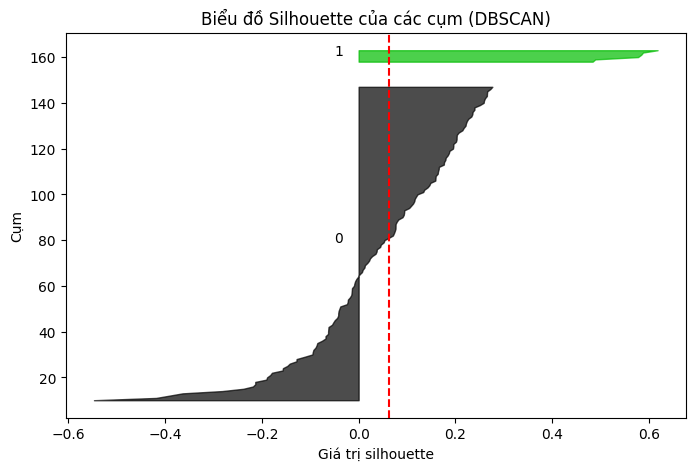

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Lọc bỏ điểm nhiễu (Cluster = -1)
filtered_df = df[df['Cluster'] != -1]
X_filtered = X_scaled[df['Cluster'] != -1]
labels_filtered = filtered_df['Cluster']

# Kiểm tra nếu có ít nhất 2 cụm thì mới vẽ biểu đồ
if len(set(labels_filtered)) > 1:
    silhouette_avg = silhouette_score(X_filtered, labels_filtered)
    sample_silhouette_values = silhouette_samples(X_filtered, labels_filtered)

    plt.figure(figsize=(8, 5))
    y_lower = 10

    for i in np.unique(labels_filtered):
        ith_cluster_silhouette_values = sample_silhouette_values[labels_filtered == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = len(ith_cluster_silhouette_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(set(labels_filtered)))
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.xlabel("Giá trị silhouette")
    plt.ylabel("Cụm")
    plt.title("Biểu đồ Silhouette của các cụm (DBSCAN)")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

else:
    print("Không thể vẽ biểu đồ Silhouette vì chỉ có một cụm hoặc toàn bộ điểm bị coi là nhiễu.")
